# Lab 11a
In this lab you are going to use tools covered in course notebooks 3 and 4, so you should review those before you start, especially the part on interpolation in course notebook 4 and on how to read a file with a number of columns using, for example, numpy's `loadtxt` method in course notebook number 3. 

In notebook 11 we are using reaction rate coefficients to determine the species production and destruction terms on the right-hand side of the set of ODEs. There, for simplcity we have just populated one list called `rate`  with the four values needed for a particular temperature. This means that we can only solve the equations for one constant temperature, which is quite limiting and not very realistic. We wish to expand on this by reading in the complete T-dependent data table for each reaction and assign it to a suitable variable type and creating a function that takes the temperature as an argument and returns a `rate` list for all four reactions for that temperature. This will allow is in a next step to solve the network for a so-called trajectory, in which the temperature changes as a function of time according to the changing conditions in a star or supernova explosion.

Specifically, to the following:

* Devise a code cell that will download (look into the `urllib.request.urlretrieve` method) the required files from the NACRE web page, the URLs are typically something like `http://www.astro.ulb.ac.be/nacreii/data/12cpg13n.dat` - check the details on their web page linked from the course notebook.
* Make a plot of all four rates in the T range `(0.004,0.05)`. Plot the `log10` of the reaction rate. Make sure that you use different markers, linestyles and colors. Plot the column `adopted` from the data file.
* Use `interpolate.interp1d` to interpolate the data table for a given temperature T.
* Combine everyting into a function that can be called as follows:

```python
rate = get_rates(0.09)
```
yields the output
```python
print(rate)
[7.359999999999993e-06, 3.520000000000005e-05, 2.3599999999999936e-07, 0.020300000000000016]
```

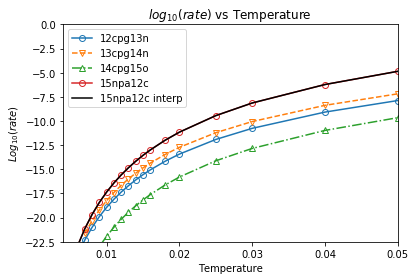

In [7]:
## Importing required Modules##
###############################
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import urllib
import scipy.interpolate as interpolate
from matplotlib import lines
from matplotlib import markers
########################################

## Downloading the correct data and saving it to a dictionary #####
###################################################################
files=["12cpg13n.dat","13cpg14n.dat","14npg15o.dat","15npa12c.dat"]
paths=[];dat12c=[];dat13c=[];dat14n=[];dat15n=[];
dat=[]
n=0
for c in files:
#     print(c)
    f=urllib.request.urlretrieve("http://www.astro.ulb.ac.be/nacreii/data/"+"%s"%c)
    paths.append(f[0])
for path in paths:
    f=open(path)
    for l in f.readlines()[1:]:
        dat.append(l.split())  
    if n==0:
        dat12c.extend(dat)
    if n==1:
        dat13c.extend(dat)
    if n==2:
        dat14n.extend(dat)
    if n==3:
        dat15n.extend(dat)
    n+=1
    
data={"12c": np.array(dat12c,dtype="float64").T,\ # Key for each data set is one of (12c,13c,14n,15n) respectively. 
      "13c":np.array(dat13c,dtype="float64").T,\
      "14n":np.array(dat14n,dtype="float64").T,\
      "15n":np.array(dat15n,dtype="float64").T}
##################################################


########## Plotting Rate vs Temp ###########
############################################
mstyles = markers.MarkerStyle.filled_markers
lstyles = list(lines.lineStyles.keys())[0:4]
elements=["12c","13c","14n","15n"];
labels=["12cpg13n","13cpg14n","14cpg15o","15npa12c"];

check=[];m=0
for e,lab in zip(elements,labels):
    index2=[]
    for i,T in enumerate(data[e][0]):
        if T>=6*10**-3 and T<=0.05:
            if i not in check:
                index2.append(i)
            check.append(i)
    s=index2[0],index2[-1]
    start=s[0];end=s[1]+1
    plt.plot(data[e][0][start:end],\
             np.log10(data[e][1][start:end]),\
             lstyles[m]+mstyles[m],\
             fillstyle='none',\
             label=lab)
    m+=1
    if m==3:
        m=0
#################### Creating the Interpolated data for Nitrogen 15 ##############################
##################################################################################################
interped=interpolate.interp1d(data[e][0][start:end],data[e][1][start:end],fill_value='extrapolate')
y=interped(data[e][0][start:end])
plt.plot(data[e][0][start:end],np.log10(y),"k-",label=lab+" interp",fillstyle="none")
plt.xlabel("Temperature")
plt.ylabel("$Log_{10}(rate)$")
plt.xlim([0.004,0.05])
plt.ylim([-22.5,0])
plt.title("$log_{10}(rate)$ vs Temperature")
plt.legend()
plt.show()
###################################################################################################

In [13]:
import urllib
import numpy as np
import scipy.interpolate as interpolate


def data_aq():
    '''
    gathers the data for the nuclear process described in notebook 11
    
    input: None
    
    output: Path to each of the files downloaded
    '''
    files=["12cpg13n.dat","13cpg14n.dat","14npg15o.dat","15npa12c.dat"]
    paths=[]
    for c in files:
        f=urllib.request.urlretrieve("http://www.astro.ulb.ac.be/nacreii/data/"+"%s"%c)
        paths.append(f[0])
    return paths
def get_rates(Temperature):
    '''
    Creates an interpolated function (with extrapolation)
    
    takes the input temperature and determines the reaction rate of all four reactions at that rate.
    
    Input: Temperature
    Output: np.array(rates,"Float64"); A 1x4 array of the reaction rates for c12,c13,n14,n15
    '''
    paths=data_aq();    interps=[];    rates=[];
    for path in paths:
        f=np.loadtxt(path).T
        x=f[0];        y=f[1];
        y=interpolate.interp1d(x,y,fill_value='extrapolate')
        interps.append(y)
    for i in interps:
        rates.append(i(Temperature))
    return np.array(rates,"str")
rate = get_rates(0.09)
print(" ".join(rate))
print(rate)

7.36e-06 3.52e-05 2.36e-07 0.0203
['7.36e-06' '3.52e-05' '2.36e-07' '0.0203']
